In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

# accessing data library
from statsbombpy import sb

# opening the libraries as DF's
from mplsoccer import Sbopen
parser = Sbopen()

# drawing pitches 
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch

In [2]:
# Choose the match event data...

sample_match = sb.events(match_id=3764234)

In [3]:
# CHECK THE AVAILABLE COLUMNS...

sample_match.columns

Index(['ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_offensive', 'carry_end_location', 'clearance_aerial_won',
       'clearance_body_part', 'clearance_head', 'clearance_left_foot',
       'clearance_right_foot', 'counterpress', 'dribble_nutmeg',
       'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_offensive',
       'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive',
       'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_technique', 'goalkeeper_type', 'id',
       'index', 'interception_outcome', 'location', 'match_id', 'minute',
       'miscontrol_aerial_won', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_cut_back', 'pass_deflected', 'pass_end_location', 'pass_height',
       'pass_inswinging', 'pass_length', 'p

In [5]:
sample_match.shape

(3758, 88)

+ 'possession' column indentifies a single passage of play in which a team is in control of the ball
+ 'possession_team' column indentifies the team that had started the possession.
+ 'team' colummn identifies the team this specific event relates to.

In [67]:
sample_match[sample_match['possession']==16].head(40)

,ball_receipt_outcome,ball_recovery_recovery_failure,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,...,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Manchester City WFC,746,00:07:24.806,Pass,NaN
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Manchester City WFC,746,00:07:31.081,Pass,NaN
102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Manchester City WFC,746,00:07:34.938,Pass,NaN
103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Manchester City WFC,746,00:07:36.369,Pass,NaN
104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Manchester City WFC,746,00:07:37.642,Pass,NaN
105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Manchester City WFC,746,00:07:44.183,Pass,NaN
106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Manchester City WFC,746,00:07:47.348,Pass,NaN
107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Manchester City WFC,746,00:07:49.244,Pass,NaN
108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Aston Villa,2647,00:07:51.734,Pass,NaN
109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Manchester City WFC,746,00:07:53.726,Pass,NaN


In [6]:
## ESTABLISH THE POSSESSION CHAINS BEGINING WITH A GOAL KICK FOR THIS GAME...

gk_chains = (sample_match[(sample_match['play_pattern']=='From Goal Kick')]['possession'].unique())
gk_chain_list = gk_chains.tolist()
gk_chain_list

[3,
 16,
 17,
 25,
 32,
 33,
 42,
 44,
 52,
 57,
 62,
 68,
 83,
 85,
 98,
 100,
 117,
 122,
 143,
 145,
 173]

In [7]:
## ESTABLISH THE POSSESSION CHAINS WHICH COME AFTER THOSE BEGINNING WITH A GOAL KICK...
aftr_gk_chain_list = (gk_chains+1).tolist()
aftr_gk_chain_list

[4,
 17,
 18,
 26,
 33,
 34,
 43,
 45,
 53,
 58,
 63,
 69,
 84,
 86,
 99,
 101,
 118,
 123,
 144,
 146,
 174]

In [7]:
# CHECK THE INDIVIDUAL 'TYPE' VALUES...

sample_match['type'].unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Shot', 'Block', 'Goal Keeper', 'Ball Recovery',
       'Duel', 'Dribbled Past', 'Dribble', 'Dispossessed', 'Clearance',
       'Error', 'Interception', 'Miscontrol', 'Foul Committed',
       'Foul Won', 'Shield', 'Half End', 'Substitution', 'Tactical Shift',
       'Injury Stoppage', 'Referee Ball-Drop', 'Offside'], dtype=object)

## <ins> IMPORTANT NOTE

+ The shot end location gives the location of the shot, **relative to the goal frame if outcome = goal/saved/Off T <ins>_OR_** **relative to the pich if outcome = blocked**, as per p.35 of the [doc sheet](https://github.com/statsbomb/open-data/blob/master/doc/StatsBomb%20Open%20Data%20Specification%20v1.1.pdf)

In [8]:
type(sample_match[sample_match['shot_end_location'].notnull()]['shot_end_location'])

pandas.core.series.Series

In [9]:
## Split the location info into X,Y (and Z for shot) columns ##

df = sample_match.copy()
df[['X_start', 'Y_start']] = df['location'].apply(pd.Series)
df[['X_end_pass', 'Y_end_pass']] = df['pass_end_location'].apply(pd.Series)
df[['X_end_carry', 'Y_end_carry']] = df['carry_end_location'].apply(pd.Series)
df[['X_end_shot', 'Y_end_shot', 'Z_end_shot']] = df['shot_end_location'].apply(pd.Series)
df[['X_end_gk', 'Y_end_gk']] = df['goalkeeper_end_location'].apply(pd.Series)

In [10]:
## Ensure this has worked

df[df["type"] == "Goal Keeper"][['X_start', 'Y_start', 
                          'X_end_pass', 'Y_end_pass', 
                          'X_end_carry', 'Y_end_carry', 
                          'X_end_shot', 'Y_end_shot', 'Z_end_shot',
                          'X_end_gk', 'Y_end_gk']]

,X_start,Y_start,X_end_pass,Y_end_pass,X_end_carry,Y_end_carry,X_end_shot,Y_end_shot,Z_end_shot,X_end_gk,Y_end_gk
3281,2.0,41.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,41.8
3282,3.1,40.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.1,40.8
3283,1.9,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.9,42.0
3284,12.5,27.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3285,1.8,42.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.8,42.3
3286,2.6,43.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.6,43.7
3287,3.0,39.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,39.2
3288,7.0,44.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3289,1.8,41.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.8,41.4
3290,13.6,61.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Check the shot outcome

df[df['shot_end_location'].notnull()][
    ['timestamp', 'duration','possession','possession_team','play_pattern',
     'type','team','player','position','location',
     'pass_end_location','carry_end_location','shot_end_location','goalkeeper_end_location',
     'pass_length','pass_height','pass_outcome','pass_body_part','pass_shot_assist',
     'shot_statsbomb_xg','shot_outcome'
    ]]

,timestamp,duration,possession,possession_team,play_pattern,type,team,player,position,location,...,carry_end_location,shot_end_location,goalkeeper_end_location,pass_length,pass_height,pass_outcome,pass_body_part,pass_shot_assist,shot_statsbomb_xg,shot_outcome
3222,00:00:13.032,0.123081,2,Manchester City WFC,From Kick Off,Shot,Manchester City WFC,Georgia Stanway,Center Forward,"[109.7, 35.5]",...,NaN,"[112.7, 35.9]",NaN,NaN,NaN,NaN,NaN,NaN,0.235482,Blocked
3223,00:00:14.283,0.863423,2,Manchester City WFC,From Kick Off,Shot,Manchester City WFC,Samantha June Mewis,Right Center Midfield,"[111.6, 38.9]",...,NaN,"[120.0, 35.2, 0.6]",NaN,NaN,NaN,NaN,NaN,NaN,0.126316,Off T
3224,00:03:14.029,0.209700,10,Manchester City WFC,From Throw In,Shot,Manchester City WFC,Georgia Stanway,Center Forward,"[110.8, 35.5]",...,NaN,"[114.2, 36.4]",NaN,NaN,NaN,NaN,NaN,NaN,0.131053,Blocked
3225,00:05:51.093,0.434146,13,Aston Villa,Regular Play,Shot,Manchester City WFC,Georgia Stanway,Center Forward,"[113.5, 46.6]",...,NaN,"[120.0, 41.6, 0.2]",NaN,NaN,NaN,NaN,NaN,NaN,0.986126,Goal
3226,00:09:52.497,0.138666,20,Aston Villa,From Free Kick,Shot,Aston Villa,Caroline Siems,Left Back,"[106.3, 30.3]",...,NaN,"[107.2, 30.8]",NaN,NaN,NaN,NaN,NaN,NaN,0.037251,Blocked
3227,00:10:20.527,0.174914,21,Manchester City WFC,Regular Play,Shot,Aston Villa,Stine Larsen,Center Forward,"[108.0, 29.4]",...,NaN,"[109.0, 30.1]",NaN,NaN,NaN,NaN,NaN,NaN,0.065237,Blocked
3228,00:14:44.275,1.119589,31,Manchester City WFC,Regular Play,Shot,Manchester City WFC,Georgia Stanway,Center Forward,"[98.4, 44.6]",...,NaN,"[120.0, 30.2, 4.5]",NaN,NaN,NaN,NaN,NaN,NaN,0.076393,Off T
3229,00:20:34.170,1.314514,42,Aston Villa,From Goal Kick,Shot,Manchester City WFC,Georgia Stanway,Center Forward,"[113.2, 34.5]",...,NaN,"[120.0, 36.7, 0.2]",NaN,NaN,NaN,NaN,NaN,NaN,0.703629,Goal
3230,00:21:41.858,1.022811,43,Aston Villa,From Kick Off,Shot,Aston Villa,Ramona Petzelberger,Left Center Midfield,"[102.5, 28.9]",...,NaN,"[120.0, 46.5, 4.2]",NaN,NaN,NaN,NaN,NaN,NaN,0.047844,Off T
3231,00:34:10.664,1.295265,69,Aston Villa,Regular Play,Shot,Aston Villa,Stine Larsen,Center Forward,"[92.0, 38.7]",...,NaN,"[116.6, 38.8, 0.0]",NaN,NaN,NaN,NaN,NaN,NaN,0.024923,Saved


In [12]:
## CHECKING END LOCATION ##

df.iloc[3223][['timestamp', 'duration','possession','possession_team','play_pattern',
                         'type','team','player','position',
                         'X_start', 'Y_start', 
                         'X_end_pass', 'Y_end_pass', 
                         'X_end_carry', 'Y_end_carry', 
                         'X_end_shot', 'Y_end_shot', 'Z_end_shot',
                         'pass_length','pass_height','pass_outcome','pass_body_part','pass_shot_assist',
                         'shot_statsbomb_xg','shot_outcome']]

timestamp                     00:00:14.283
duration                          0.863423
possession                               2
possession_team        Manchester City WFC
play_pattern                 From Kick Off
type                                  Shot
team                   Manchester City WFC
player                 Samantha June Mewis
position             Right Center Midfield
X_start                              111.6
Y_start                               38.9
X_end_pass                             NaN
Y_end_pass                             NaN
X_end_carry                            NaN
Y_end_carry                            NaN
X_end_shot                           120.0
Y_end_shot                            35.2
Z_end_shot                             0.6
pass_length                            NaN
pass_height                            NaN
pass_outcome                           NaN
pass_body_part                         NaN
pass_shot_assist                       NaN
shot_statsb

In [13]:
# SET NECESSARY COLUMNS FOR THE CHAINS' DFs...

avfc_mcfc_050920 = df[['timestamp', 'duration','possession','possession_team','play_pattern',
                       'type','team','player','position',
                       'pass_length','pass_height','pass_outcome','pass_body_part','pass_shot_assist',
                       'shot_statsbomb_xg','shot_outcome',
                       'X_start', 'Y_start', 
                       'X_end_pass', 'Y_end_pass', 
                       'X_end_carry', 'Y_end_carry', 
                       'X_end_shot', 'Y_end_shot', 'Z_end_shot']]

avfc_mcfc_050920

,timestamp,duration,possession,possession_team,play_pattern,type,team,player,position,pass_length,...,shot_outcome,X_start,Y_start,X_end_pass,Y_end_pass,X_end_carry,Y_end_carry,X_end_shot,Y_end_shot,Z_end_shot
0,00:00:00.000,0.0,1,Aston Villa,Regular Play,Starting XI,Aston Villa,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00:00:00.000,0.0,1,Aston Villa,Regular Play,Starting XI,Manchester City WFC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00:00:00.000,0.0,1,Aston Villa,Regular Play,Half Start,Manchester City WFC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00:00:00.000,0.0,1,Aston Villa,Regular Play,Half Start,Aston Villa,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00:00:00.000,0.0,91,Manchester City WFC,Regular Play,Half Start,Manchester City WFC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3753,00:40:44.219,0.0,175,Aston Villa,Regular Play,Tactical Shift,Manchester City WFC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3754,00:22:36.390,0.0,136,Manchester City WFC,Regular Play,Injury Stoppage,Aston Villa,Marisa Ewers,Right Center Midfield,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3755,00:23:22.542,0.0,137,Manchester City WFC,Other,Referee Ball-Drop,Manchester City WFC,NaN,NaN,NaN,...,NaN,67.0,52.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3756,00:23:23.355,0.0,138,Aston Villa,Other,Referee Ball-Drop,Aston Villa,NaN,NaN,NaN,...,NaN,55.7,28.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
## CREATE A DF A SINGLE GK CHAIN...

chain_16 = avfc_mcfc_050920[(avfc_mcfc_050920['possession']==16)]
chain_16

,timestamp,duration,possession,possession_team,play_pattern,type,team,player,position,pass_length,...,shot_outcome,X_start,Y_start,X_end_pass,Y_end_pass,X_end_carry,Y_end_carry,X_end_shot,Y_end_shot,Z_end_shot
100,00:07:24.806,1.577936,16,Manchester City WFC,From Goal Kick,Pass,Manchester City WFC,Ellie Roebuck,Goalkeeper,20.374739,...,NaN,6.0,44.0,11.2,24.3,NaN,NaN,NaN,NaN,NaN
101,00:07:31.081,1.589849,16,Manchester City WFC,From Goal Kick,Pass,Manchester City WFC,Gemma Bonner,Left Center Back,18.753666,...,NaN,14.6,23.9,6.9,41.0,NaN,NaN,NaN,NaN,NaN
102,00:07:34.938,0.659356,16,Manchester City WFC,From Goal Kick,Pass,Manchester City WFC,Ellie Roebuck,Goalkeeper,13.054118,...,NaN,9.5,42.9,7.5,55.8,NaN,NaN,NaN,NaN,NaN
103,00:07:36.369,1.187621,16,Manchester City WFC,From Goal Kick,Pass,Manchester City WFC,Stephanie Houghton,Right Center Back,16.923948,...,NaN,7.5,55.1,24.4,56.0,NaN,NaN,NaN,NaN,NaN
104,00:07:37.642,1.865463,16,Manchester City WFC,From Goal Kick,Pass,Manchester City WFC,Samantha June Mewis,Right Center Midfield,19.136614,...,NaN,23.4,55.1,27.9,73.7,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3443,00:07:42.182,0.000000,16,Manchester City WFC,From Goal Kick,Duel,Aston Villa,Ramona Petzelberger,Left Center Midfield,NaN,...,NaN,73.4,6.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3507,00:08:12.618,0.000000,16,Manchester City WFC,From Goal Kick,Dribbled Past,Aston Villa,Ramona Petzelberger,Left Center Midfield,NaN,...,NaN,22.5,47.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3545,00:07:42.182,0.000000,16,Manchester City WFC,From Goal Kick,Dribble,Manchester City WFC,Esme Beth Morgan,Right Back,NaN,...,NaN,46.7,73.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3546,00:08:12.618,0.000000,16,Manchester City WFC,From Goal Kick,Dribble,Manchester City WFC,Georgia Stanway,Center Forward,NaN,...,NaN,97.6,32.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#get passes

c16_pass = chain_16[chain_16["type"]=="Pass"]

# or... 

#c16_pass = chain_16.loc[(chain_16["type"] == "Pass")]

c16_pass

,timestamp,duration,possession,possession_team,play_pattern,type,team,player,position,pass_length,...,shot_outcome,X_start,Y_start,X_end_pass,Y_end_pass,X_end_carry,Y_end_carry,X_end_shot,Y_end_shot,Z_end_shot
100,00:07:24.806,1.577936,16,Manchester City WFC,From Goal Kick,Pass,Manchester City WFC,Ellie Roebuck,Goalkeeper,20.374739,...,NaN,6.0,44.0,11.2,24.3,NaN,NaN,NaN,NaN,NaN
101,00:07:31.081,1.589849,16,Manchester City WFC,From Goal Kick,Pass,Manchester City WFC,Gemma Bonner,Left Center Back,18.753666,...,NaN,14.6,23.9,6.9,41.0,NaN,NaN,NaN,NaN,NaN
102,00:07:34.938,0.659356,16,Manchester City WFC,From Goal Kick,Pass,Manchester City WFC,Ellie Roebuck,Goalkeeper,13.054118,...,NaN,9.5,42.9,7.5,55.8,NaN,NaN,NaN,NaN,NaN
103,00:07:36.369,1.187621,16,Manchester City WFC,From Goal Kick,Pass,Manchester City WFC,Stephanie Houghton,Right Center Back,16.923948,...,NaN,7.5,55.1,24.4,56.0,NaN,NaN,NaN,NaN,NaN
104,00:07:37.642,1.865463,16,Manchester City WFC,From Goal Kick,Pass,Manchester City WFC,Samantha June Mewis,Right Center Midfield,19.136614,...,NaN,23.4,55.1,27.9,73.7,NaN,NaN,NaN,NaN,NaN
105,00:07:44.183,1.525836,16,Manchester City WFC,From Goal Kick,Pass,Manchester City WFC,Esme Beth Morgan,Right Back,18.069311,...,NaN,49.5,68.4,32.8,61.5,NaN,NaN,NaN,NaN,NaN
106,00:07:47.348,1.835327,16,Manchester City WFC,From Goal Kick,Pass,Manchester City WFC,Stephanie Houghton,Right Center Back,27.543602,...,NaN,33.2,59.6,55.9,75.2,NaN,NaN,NaN,NaN,NaN
107,00:07:49.244,0.901067,16,Manchester City WFC,From Goal Kick,Pass,Manchester City WFC,Janine Elizabeth Beckie,Right Wing,7.710382,...,NaN,56.1,75.2,55.7,67.5,NaN,NaN,NaN,NaN,NaN
108,00:07:51.734,0.177500,16,Manchester City WFC,From Goal Kick,Pass,Aston Villa,Marisa Ewers,Right Center Midfield,3.342155,...,NaN,68.3,4.2,70.4,6.8,NaN,NaN,NaN,NaN,NaN
109,00:07:53.726,1.177933,16,Manchester City WFC,From Goal Kick,Pass,Manchester City WFC,Esme Beth Morgan,Right Back,17.913403,...,NaN,46.9,72.7,34.9,59.4,NaN,NaN,NaN,NaN,NaN


In [16]:
#get carries

c16_carry = chain_16[chain_16["type"] == "Carry"]

# or... 

#c16_carry = chain_16.loc[(chain_16["type"] == "Carry")]

c16_carry

,timestamp,duration,possession,possession_team,play_pattern,type,team,player,position,pass_length,...,shot_outcome,X_start,Y_start,X_end_pass,Y_end_pass,X_end_carry,Y_end_carry,X_end_shot,Y_end_shot,Z_end_shot
2089,00:07:26.384,4.696928,16,Manchester City WFC,From Goal Kick,Carry,Manchester City WFC,Gemma Bonner,Left Center Back,NaN,...,NaN,11.2,24.3,NaN,NaN,14.6,23.9,NaN,NaN,NaN
2090,00:07:32.671,2.267667,16,Manchester City WFC,From Goal Kick,Carry,Manchester City WFC,Ellie Roebuck,Goalkeeper,NaN,...,NaN,6.9,41.0,NaN,NaN,9.5,42.9,NaN,NaN,NaN
2091,00:07:35.598,0.771255,16,Manchester City WFC,From Goal Kick,Carry,Manchester City WFC,Stephanie Houghton,Right Center Back,NaN,...,NaN,7.5,55.8,NaN,NaN,7.5,55.1,NaN,NaN,NaN
2092,00:07:37.557,0.085177,16,Manchester City WFC,From Goal Kick,Carry,Manchester City WFC,Samantha June Mewis,Right Center Midfield,NaN,...,NaN,24.4,56.0,NaN,NaN,23.4,55.1,NaN,NaN,NaN
2093,00:07:39.507,2.674942,16,Manchester City WFC,From Goal Kick,Carry,Manchester City WFC,Esme Beth Morgan,Right Back,NaN,...,NaN,27.9,73.7,NaN,NaN,46.7,73.9,NaN,NaN,NaN
2094,00:07:43.476,0.707317,16,Manchester City WFC,From Goal Kick,Carry,Manchester City WFC,Esme Beth Morgan,Right Back,NaN,...,NaN,47.8,71.8,NaN,NaN,49.5,68.4,NaN,NaN,NaN
2095,00:07:45.709,1.638609,16,Manchester City WFC,From Goal Kick,Carry,Manchester City WFC,Stephanie Houghton,Right Center Back,NaN,...,NaN,32.8,61.5,NaN,NaN,33.2,59.6,NaN,NaN,NaN
2096,00:07:49.183,0.060865,16,Manchester City WFC,From Goal Kick,Carry,Manchester City WFC,Janine Elizabeth Beckie,Right Wing,NaN,...,NaN,55.9,75.2,NaN,NaN,56.1,75.2,NaN,NaN,NaN
2097,00:07:50.145,1.589012,16,Manchester City WFC,From Goal Kick,Carry,Aston Villa,Marisa Ewers,Right Center Midfield,NaN,...,NaN,64.4,12.6,NaN,NaN,68.3,4.2,NaN,NaN,NaN
2098,00:07:54.904,2.122001,16,Manchester City WFC,From Goal Kick,Carry,Manchester City WFC,Stephanie Houghton,Right Center Back,NaN,...,NaN,34.9,59.4,NaN,NaN,34.7,59.0,NaN,NaN,NaN


In [17]:
# get shots
c16_shot = chain_16[chain_16["type"] == "Shot"]

# or...
#c16_shot = chain_16.loc[(chain_16["type"] == "Shot")]

c16_shot

,timestamp,duration,possession,possession_team,play_pattern,type,team,player,position,pass_length,...,shot_outcome,X_start,Y_start,X_end_pass,Y_end_pass,X_end_carry,Y_end_carry,X_end_shot,Y_end_shot,Z_end_shot


In [18]:
## DATA NOT CONSIDERED

#get events different than pass, carry, or shot (no end_location)
    ##not_pass = chain.loc[chain["eventName"] != "Pass"].iloc[:-1]

chain_16.loc[(chain_16["type"] != "Pass") & 
             (chain_16["type"] != "Carry") & 
             (chain_16["type"] != 'Shot')].head(40)

,timestamp,duration,possession,possession_team,play_pattern,type,team,player,position,pass_length,...,shot_outcome,X_start,Y_start,X_end_pass,Y_end_pass,X_end_carry,Y_end_carry,X_end_shot,Y_end_shot,Z_end_shot
1122,00:07:26.384,NaN,16,Manchester City WFC,From Goal Kick,Ball Receipt*,Manchester City WFC,Gemma Bonner,Left Center Back,NaN,...,NaN,11.2,24.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1123,00:07:32.671,NaN,16,Manchester City WFC,From Goal Kick,Ball Receipt*,Manchester City WFC,Ellie Roebuck,Goalkeeper,NaN,...,NaN,6.9,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1124,00:07:35.598,NaN,16,Manchester City WFC,From Goal Kick,Ball Receipt*,Manchester City WFC,Stephanie Houghton,Right Center Back,NaN,...,NaN,7.5,55.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1125,00:07:37.557,NaN,16,Manchester City WFC,From Goal Kick,Ball Receipt*,Manchester City WFC,Samantha June Mewis,Right Center Midfield,NaN,...,NaN,24.4,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1126,00:07:39.507,NaN,16,Manchester City WFC,From Goal Kick,Ball Receipt*,Manchester City WFC,Esme Beth Morgan,Right Back,NaN,...,NaN,27.9,73.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1127,00:07:45.709,NaN,16,Manchester City WFC,From Goal Kick,Ball Receipt*,Manchester City WFC,Stephanie Houghton,Right Center Back,NaN,...,NaN,32.8,61.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1128,00:07:49.183,NaN,16,Manchester City WFC,From Goal Kick,Ball Receipt*,Manchester City WFC,Janine Elizabeth Beckie,Right Wing,NaN,...,NaN,55.9,75.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1129,00:07:50.145,NaN,16,Manchester City WFC,From Goal Kick,Ball Receipt*,Manchester City WFC,Samantha June Mewis,Right Center Midfield,NaN,...,NaN,53.1,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1130,00:07:51.912,NaN,16,Manchester City WFC,From Goal Kick,Ball Receipt*,Aston Villa,Diana Micaela Abreu de Sousa e Silva,Left Wing,NaN,...,NaN,70.4,6.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1131,00:07:54.904,NaN,16,Manchester City WFC,From Goal Kick,Ball Receipt*,Manchester City WFC,Stephanie Houghton,Right Center Back,NaN,...,NaN,34.9,59.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
## SIMPLIFIED CHAIN BEING EXPLORED...

c16_test = chain_16.loc[(chain_16["type"] == "Pass") | 
             (chain_16["type"] == "Carry") | 
             (chain_16["type"] == 'Shot')].sort_values(by='timestamp')

c16_test

,timestamp,duration,possession,possession_team,play_pattern,type,team,player,position,pass_length,...,shot_outcome,X_start,Y_start,X_end_pass,Y_end_pass,X_end_carry,Y_end_carry,X_end_shot,Y_end_shot,Z_end_shot
100,00:07:24.806,1.577936,16,Manchester City WFC,From Goal Kick,Pass,Manchester City WFC,Ellie Roebuck,Goalkeeper,20.374739,...,NaN,6.0,44.0,11.2,24.3,NaN,NaN,NaN,NaN,NaN
2089,00:07:26.384,4.696928,16,Manchester City WFC,From Goal Kick,Carry,Manchester City WFC,Gemma Bonner,Left Center Back,NaN,...,NaN,11.2,24.3,NaN,NaN,14.6,23.9,NaN,NaN,NaN
101,00:07:31.081,1.589849,16,Manchester City WFC,From Goal Kick,Pass,Manchester City WFC,Gemma Bonner,Left Center Back,18.753666,...,NaN,14.6,23.9,6.9,41.0,NaN,NaN,NaN,NaN,NaN
2090,00:07:32.671,2.267667,16,Manchester City WFC,From Goal Kick,Carry,Manchester City WFC,Ellie Roebuck,Goalkeeper,NaN,...,NaN,6.9,41.0,NaN,NaN,9.5,42.9,NaN,NaN,NaN
102,00:07:34.938,0.659356,16,Manchester City WFC,From Goal Kick,Pass,Manchester City WFC,Ellie Roebuck,Goalkeeper,13.054118,...,NaN,9.5,42.9,7.5,55.8,NaN,NaN,NaN,NaN,NaN
2091,00:07:35.598,0.771255,16,Manchester City WFC,From Goal Kick,Carry,Manchester City WFC,Stephanie Houghton,Right Center Back,NaN,...,NaN,7.5,55.8,NaN,NaN,7.5,55.1,NaN,NaN,NaN
103,00:07:36.369,1.187621,16,Manchester City WFC,From Goal Kick,Pass,Manchester City WFC,Stephanie Houghton,Right Center Back,16.923948,...,NaN,7.5,55.1,24.4,56.0,NaN,NaN,NaN,NaN,NaN
2092,00:07:37.557,0.085177,16,Manchester City WFC,From Goal Kick,Carry,Manchester City WFC,Samantha June Mewis,Right Center Midfield,NaN,...,NaN,24.4,56.0,NaN,NaN,23.4,55.1,NaN,NaN,NaN
104,00:07:37.642,1.865463,16,Manchester City WFC,From Goal Kick,Pass,Manchester City WFC,Samantha June Mewis,Right Center Midfield,19.136614,...,NaN,23.4,55.1,27.9,73.7,NaN,NaN,NaN,NaN,NaN
2093,00:07:39.507,2.674942,16,Manchester City WFC,From Goal Kick,Carry,Manchester City WFC,Esme Beth Morgan,Right Back,NaN,...,NaN,27.9,73.7,NaN,NaN,46.7,73.9,NaN,NaN,NaN


In [20]:
## END OF THE CHAIN LOCATION

c16_test.iloc[-1::]

,timestamp,duration,possession,possession_team,play_pattern,type,team,player,position,pass_length,...,shot_outcome,X_start,Y_start,X_end_pass,Y_end_pass,X_end_carry,Y_end_carry,X_end_shot,Y_end_shot,Z_end_shot
117,00:08:16.090,3.642421,16,Manchester City WFC,From Goal Kick,Pass,Manchester City WFC,Georgia Stanway,Center Forward,31.764761,...,NaN,92.0,39.3,120.0,54.3,NaN,NaN,NaN,NaN,NaN


In [21]:
c16_test[['X_end_pass','Y_end_pass']].iloc[-1]

X_end_pass    120.0
Y_end_pass     54.3
Name: 117, dtype: float64

In [22]:
## END CHAIN LOCATION IF STATEMENTS...

if c16_test['type'].iloc[-1] == 'Carry':
    print (c16_test[['X_end_carry','Y_end_carry']].iloc[-1])
elif c16_test['type'].iloc[-1] == 'Pass':
    print (c16_test[['X_end_pass','Y_end_pass']].iloc[-1])
elif c16_test['type'].iloc[-1] == 'Shot':
    print(c16_test[['X_end_shot','Y_end_shot']].iloc[-1])

X_end_pass    120.0
Y_end_pass     54.3
Name: 117, dtype: float64


In [23]:
if c16_test['type'].iloc[-1] == 'Carry':
    x_test = c16_test['X_end_carry'].iloc[-1]
    y_test = c16_test[['Y_end_carry']].iloc[-1]
elif c16_test['type'].iloc[-1] == 'Pass':
    x_test = c16_test['X_end_pass'].iloc[-1]
    y_test = c16_test['Y_end_pass'].iloc[-1]
elif c16_test['type'].iloc[-1] == 'Shot':
    x_test = c16_test['X_end_shot'].iloc[-1]
    y_test = c16_test['Y_end_shot'].iloc[-1]
    
x_test,y_test

(120.0, 54.3)

In [64]:
chain_173 = avfc_mcfc_050920[(avfc_mcfc_050920['possession']==117)]
chain_173 = chain_173.loc[(chain_173["type"] == "Pass") | 
             (chain_173["type"] == "Carry") | 
             (chain_173["type"] == 'Shot')].sort_values(by='timestamp')
chain_173

,timestamp,duration,possession,possession_team,play_pattern,type,team,player,position,pass_length,...,shot_outcome,X_start,Y_start,X_end_pass,Y_end_pass,X_end_carry,Y_end_carry,X_end_shot,Y_end_shot,Z_end_shot
642,00:11:16.608,2.848284,117,Aston Villa,From Goal Kick,Pass,Aston Villa,Sian Rogers,Goalkeeper,52.267868,...,NaN,6.0,36.0,56.8,23.7,NaN,NaN,NaN,NaN,NaN
643,00:11:19.456,0.982007,117,Aston Villa,From Goal Kick,Pass,Aston Villa,Stine Larsen,Center Forward,5.303772,...,NaN,56.2,23.0,50.9,23.2,NaN,NaN,NaN,NaN,NaN
2552,00:11:20.438,0.456540,117,Aston Villa,From Goal Kick,Carry,Aston Villa,Ramona Petzelberger,Left Center Midfield,NaN,...,NaN,50.9,23.2,NaN,NaN,52.2,21.9,NaN,NaN,NaN
644,00:11:20.894,1.089378,117,Aston Villa,From Goal Kick,Pass,Aston Villa,Ramona Petzelberger,Left Center Midfield,8.036168,...,NaN,52.2,21.9,49.9,14.2,NaN,NaN,NaN,NaN,NaN
2553,00:11:21.984,1.064481,117,Aston Villa,From Goal Kick,Carry,Aston Villa,Caroline Siems,Left Back,NaN,...,NaN,49.9,14.2,NaN,NaN,49.3,15.6,NaN,NaN,NaN
645,00:11:23.048,1.733188,117,Aston Villa,From Goal Kick,Pass,Aston Villa,Caroline Siems,Left Back,29.220541,...,NaN,49.3,15.6,77.1,24.6,NaN,NaN,NaN,NaN,NaN
2554,00:11:26.788,0.111510,117,Aston Villa,From Goal Kick,Carry,Aston Villa,Chloe Arthur,Center Defensive Midfield,NaN,...,NaN,71.1,31.6,NaN,NaN,69.3,29.2,NaN,NaN,NaN


In [44]:
avfc_mcfc_050920[avfc_mcfc_050920['play_pattern']=='From Goal Kick'].groupby('possession').first()

,timestamp,duration,possession_team,play_pattern,type,team,player,position,pass_length,pass_height,...,shot_outcome,X_start,Y_start,X_end_pass,Y_end_pass,X_end_carry,Y_end_carry,X_end_shot,Y_end_shot,Z_end_shot
possession,,,,,,,,,,,,,,,,,,,,,
3,00:00:33.976,2.368588,Aston Villa,From Goal Kick,Pass,Aston Villa,Sian Rogers,Goalkeeper,56.942516,High Pass,...,None,7.0,44.1,51.2,80.0,NaN,NaN,NaN,NaN,NaN
16,00:07:24.806,1.577936,Manchester City WFC,From Goal Kick,Pass,Manchester City WFC,Ellie Roebuck,Goalkeeper,20.374739,Ground Pass,...,None,6.0,44.0,11.2,24.3,14.6,23.9,NaN,NaN,NaN
17,00:08:35.325,1.925489,Aston Villa,From Goal Kick,Pass,Aston Villa,Sian Rogers,Goalkeeper,28.364767,High Pass,...,None,7.0,36.1,20.4,11.1,24.9,13.4,NaN,NaN,NaN
25,00:12:32.106,2.061370,Aston Villa,From Goal Kick,Pass,Aston Villa,Sian Rogers,Goalkeeper,28.541199,Ground Pass,...,None,7.0,44.1,20.4,69.3,26.4,69.0,NaN,NaN,NaN
32,00:15:02.034,2.565018,Aston Villa,From Goal Kick,Pass,Aston Villa,Sian Rogers,Goalkeeper,21.232286,Ground Pass,...,None,7.0,44.1,15.4,24.6,14.6,23.7,NaN,NaN,NaN
33,00:15:40.573,1.389283,Aston Villa,From Goal Kick,Pass,Aston Villa,Sian Rogers,Goalkeeper,20.925821,Ground Pass,...,None,7.0,36.1,11.2,15.6,11.0,15.6,NaN,NaN,NaN
42,00:20:31.218,0.980983,Aston Villa,From Goal Kick,Pass,Aston Villa,Sian Rogers,Goalkeeper,8.714356,Ground Pass,...,Goal,7.0,44.1,15.7,43.6,6.0,43.8,120.0,36.7,0.2
44,00:22:07.702,1.654896,Manchester City WFC,From Goal Kick,Pass,Manchester City WFC,Ellie Roebuck,Goalkeeper,28.915394,Ground Pass,...,None,6.0,36.0,30.9,21.3,20.8,25.0,NaN,NaN,NaN
52,00:26:37.142,2.078822,Aston Villa,From Goal Kick,Pass,Aston Villa,Sian Rogers,Goalkeeper,22.302017,Ground Pass,...,None,7.0,44.1,15.3,64.8,21.2,68.7,NaN,NaN,NaN


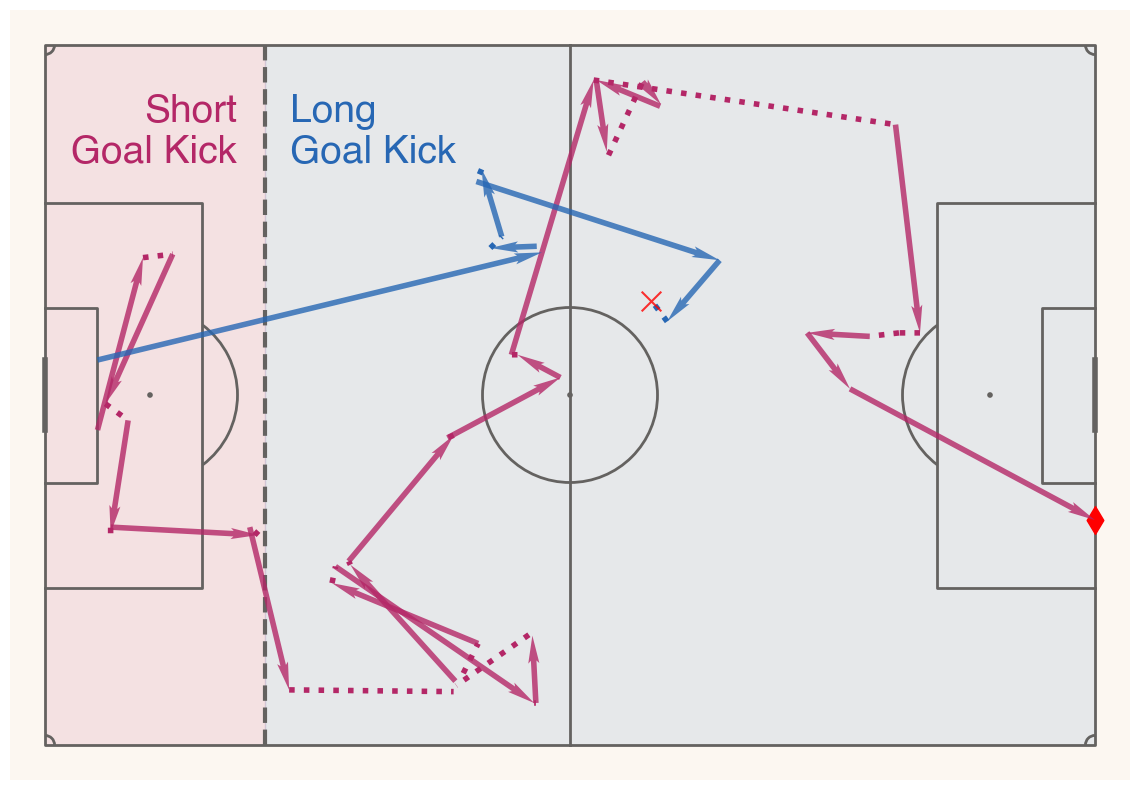

In [136]:
# Create a soccer pitch
pitch = Pitch(pitch_color='#fcf7f1', line_color='#646260', stripe=False, stripe_color='#a8cf8d',
              linestyle='-', corner_arcs = True, positional=False, line_zorder=2)

# Create a Matplotlib figure
fig, ax = pitch.draw(figsize=[12, 8])

# Shade the 'short pass' area in red / 'long pass' area in blue...
ax.fill_between([0, 25.1], 0, 80, color='#b42767', alpha=0.1, zorder=1)
ax.fill_between([25.2, 120], 0, 80, color='#2767b4', alpha=0.1, zorder=1)

# Adding the short/long pass dividing line
ax.vlines(x=25.2, ymin=0, ymax=80, color='#646260', linestyle='--', linewidth=3)

# Adding the short/long pass labeling
plt.text(x=22, y=10, s='Short\n Goal Kick', color='#b42767',rotation = 0,
         ha='right', va='center', fontsize=28, weight='bold',family='Helvetica')

plt.text(x=28, y=10, s='Long\nGoal Kick', color='#2767b4',rotation = 0,
         ha='left', va='center', fontsize=28, weight='extra bold',family='Helvetica')

#### Short Chain ####

#passes
pitch.arrows(c16_test.X_start, c16_test.Y_start, c16_test.X_end_pass, c16_test.Y_end_pass, 
             width = 4, headwidth = 2, color = "#b42767", ax=ax, zorder =  3, alpha = 0.8)

pitch.arrows(63,4,64.2,12.2,width = 4, headwidth = 2, color = "#b42767", ax=ax, zorder =  3, alpha = 0.8)
pitch.arrows(70.3,7,63,4,width = 4, headwidth = 2, color = "#b42767", ax=ax, zorder =  3, alpha = 0.8)

#carries
pitch.lines(c16_test.X_start, c16_test.Y_start,c16_test.X_end_carry, c16_test.Y_end_carry, 
            color = "#b42767", lw = 4, ls = 'dotted', ax=ax, zorder =  2)

pitch.lines(55.3, 67.4, 47, 73.2, color = "#b42767", lw = 4, ls = 'dotted', ax=ax, zorder =  2)

#shot
pitch.arrows(c16_test.X_start, c16_test.Y_start,c16_test.X_end_shot, c16_test.Y_end_shot, 
             color = "green", ax=ax, zorder =  3)

#end event
if c16_test['type'].iloc[-1] == 'Carry':
    x = c16_test['X_end_carry'].iloc[-1]
    y = c16_test[['Y_end_carry']].iloc[-1]
elif c16_test['type'].iloc[-1] == 'Pass':
    x = c16_test['X_end_pass'].iloc[-1]
    y = c16_test['Y_end_pass'].iloc[-1]
elif c16_test['type'].iloc[-1] == 'Shot':
    x = c16_test['X_end_shot'].iloc[-1]
    y = c16_test['Y_end_shot'].iloc[-1]

#end event
pitch.scatter(x, y, marker = 'd', color = "red", ax=ax, zorder =  2, s= 200)


#### Long Chain ####

#passes
pass_mask = chain_173['type'] == 'Pass'
pitch.arrows(chain_173.loc[pass_mask, 'X_start'], chain_173.loc[pass_mask, 'Y_start'],
             chain_173.loc[pass_mask, 'X_end_pass'], chain_173.loc[pass_mask, 'Y_end_pass'],
             width=4, headwidth=2, color="#2767b4", ax=ax, zorder=3, alpha = 0.8)
pitch.arrows(77.1,24.6,71.1,31.6,width=4, headwidth=2, color="#2767b4", ax=ax, zorder=3, alpha = 0.8)

#carries
carry_mask = chain_173['type'] == 'Carry'
pitch.lines(chain_173.loc[carry_mask, 'X_start'], chain_173.loc[carry_mask, 'Y_start'],
            chain_173.loc[carry_mask, 'X_end_carry'], chain_173.loc[carry_mask, 'Y_end_carry'], 
            color = "#2767b4", lw = 4, ls = 'dotted', ax=ax, zorder =  2)


#shot
shots_mask = chain_173['type'] == 'Shot'
pitch.arrows(chain_173.loc[shots_mask, 'X_start'], chain_173.loc[shots_mask, 'Y_start'],
             chain_173.loc[shots_mask, 'X_end_shot'], chain_173.loc[shots_mask, 'Y_end_shot'],
             color="green", ax=ax, zorder=3)

#end event
if chain_173['type'].iloc[-1] == 'Carry':
    x = chain_173['X_end_carry'].iloc[-1]
    y = chain_173[['Y_end_carry']].iloc[-1]
elif chain_173['type'].iloc[-1] == 'Pass':
    x = chain_173['X_end_pass'].iloc[-1]
    y = chain_173['Y_end_pass'].iloc[-1]
elif chain_173['type'].iloc[-1] == 'Shot':
    x = chain_173['X_end_shot'].iloc[-1]
    y = chain_173['Y_end_shot'].iloc[-1]

#end event
pitch.scatter(x, y, marker = 'x', color = "red", ax=ax, zorder =  2, s= 200, alpha = 0.8)


#plt.show();
plt.savefig(f'../pitch_maps/definitions.png');

distance = √((xs - x1)^2 + (y2 - y1)^2)

pitch dimensions are 120x80

````python

df['beginning'] = np.sqrt(np.square(120-df['X_start']) + (np.square(40-df['Y_start']))
df['finish'] = np.sqrt(np.square(120-df['x']) + (np.square(40-df['y'])) #taken from the end event 'if statement'


                       
``````


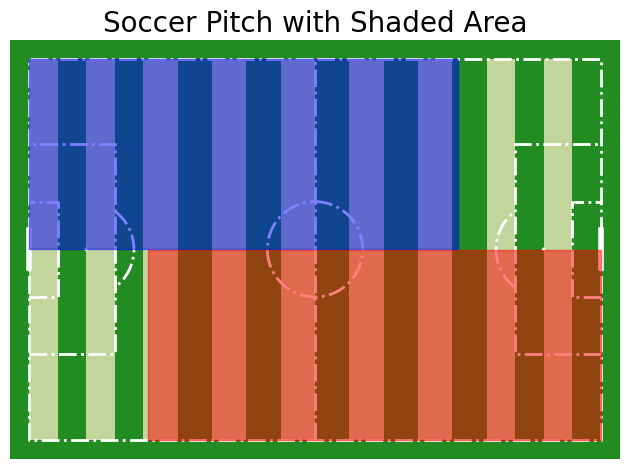

In [23]:
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch

# Create a soccer pitch
pitch = Pitch(pitch_color='forestgreen', line_color='white', stripe=True, linestyle='-.')

# Create a Matplotlib figure
fig, ax = pitch.draw()

# Shade the bottom 70% of the pitch in red
ax.fill_between([0, 90], 0, 39.9, color='blue', alpha=0.5)
ax.fill_between([25, 120], 40.1, 80, color='red', alpha=0.5)


# Customize the plot (optional)
ax.set_title('Soccer Pitch with Shaded Area', fontsize=20)

# Display the plot
plt.show()
